Creating CSV files

In [ ]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preprocess the Data: Load the images, resize them and create labels.

In [ ]:
# Directory containing the uploaded images
image_dir = '/content/drive/My Drive/Deep_Learning/Data'

In [ ]:
image_paths = []
labels = []

Load the Dataset and Class Labels

In [ ]:
for filename in os.listdir(image_dir):
    if filename.startswith("L") or filename.startswith("W"):
        image_paths.append(os.path.join(image_dir, filename))
        # Create labels based on the filenames (0 for L, 1 for W)
        if filename.startswith("L"):
            labels.append(0)
        elif filename.startswith("W"):
            labels.append(1)

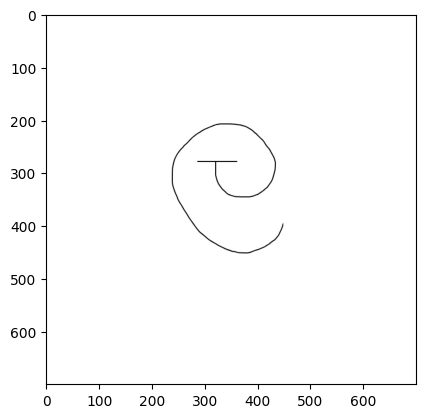

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/My Drive/Deep_Learning/Data/L04.jpeg')
plt.imshow(img)

In [ ]:
# Create a DataFrame to store image paths and labels
df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})

In [ ]:
# Define the paths for the CSV files
train_csv_path = '/content/drive/My Drive/Deep_Learning/train.csv'
test_csv_path = '/content/drive/My Drive/Deep_Learning/test.csv'

In [ ]:
os.chdir("/content/drive/My Drive/Deep_Learning")
os.getcwd()

'/content/drive/My Drive/Deep_Learning'

In [ ]:
# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Save the training and testing DataFrames as CSV files
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

In [ ]:
print(f"CSV files saved:\n- Training CSV: {train_csv_path}\n- Testing CSV: {test_csv_path}")

CSV files saved:
- Training CSV: /content/drive/My Drive/Deep_Learning/train.csv
- Testing CSV: /content/drive/My Drive/Deep_Learning/test.csv


Develop the CNN Algorithm

In [ ]:
# Define image size
image_height, image_width = 400, 400

# Define the paths for the CSV files (change these paths as needed)
train_csv_path = '/content/drive/My Drive/Deep_Learning/train.csv'
test_csv_path = '/content/drive/My Drive/Deep_Learning/test.csv'

# Load the CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)


In [ ]:
# Load and preprocess the images
def preprocess_images(image_paths, target_size=(image_height, image_width)):
    images = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img = img_to_array(img) / 255.0
        images.append(img)
    return np.array(images)

In [ ]:
X_train = preprocess_images(train_df['Image_Path'])
X_test = preprocess_images(test_df['Image_Path'])

# Convert labels to binary format (0 or 1)
Y_train = train_df['Label'].values
Y_test = test_df['Label'].values

In [ ]:
X_train = X_train.reshape(len(X_train), 400, 400, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 400, 400, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (128, 400, 400, 3)
Shape of Y_train:  (128, 1)
Shape of X_test:  (32, 400, 400, 3)
Shape of Y_test:  (32, 1)


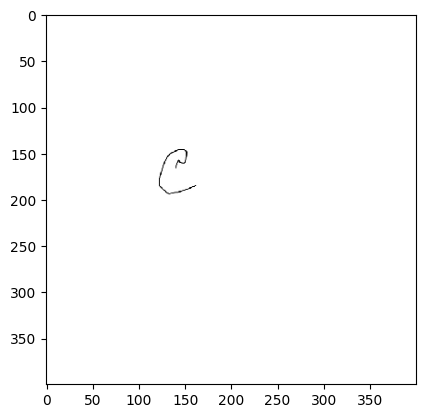

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
# Create a CNN model for binary classification
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 16)

Epoch 1/20
8/8 [==============================] - 20s 3s/step - loss: 0.0509 - accuracy: 0.9922
Epoch 2/20
8/8 [==============================] - 21s 3s/step - loss: 0.0139 - accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 20s 2s/step - loss: 0.0054 - accuracy: 1.0000
Epoch 4/20
8/8 [==============================] - 21s 3s/step - loss: 0.0027 - accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 21s 2s/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 20s 3s/step - loss: 9.9572e-04 - accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 21s 3s/step - loss: 7.3109e-04 - accuracy: 1.0000
Epoch 8/20
8/8 [==============================] - 20s 3s/step - loss: 6.3680e-04 - accuracy: 1.0000
Epoch 9/20
8/8 [==============================] - 28s 4s/step - loss: 5.2444e-04 - accuracy: 1.0000
Epoch 10/20
8/8 [==============================] - 23s 3s/step - loss: 4.6374e-04 - accuracy: 1.0000
Epoch 11/20
8/8 [==

In [ ]:
# Evaluate the model on the test data
accuracy = model.evaluate(X_test, Y_test)[1]
print(f"Test accuracy: {accuracy}")

1/1 [==============================] - 1s 1s/step - loss: 0.0342 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
# Save the trained model
model.save('/content/drive/My Drive/Deep_Learning/trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test Images

In [ ]:
# Load the trained model
model = load_model('/content/drive/My Drive/Deep_Learning/trained_model.h5')

In [ ]:
# Use the model to predict labels for the test images
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert softmax outputs to class labels

1/1 [==============================] - 2s 2s/step


In [ ]:
# Create a DataFrame to store the image paths and predicted labels
output_df = pd.DataFrame({'Image_Path': test_df['Image_Path'], 'Predicted_Label': predicted_labels})

In [ ]:
# Save the output DataFrame as a CSV file (you can change the output path)
output_csv_path = '/content/drive/My Drive/Deep_Learning/predicted_labels.csv'
output_df.to_csv(output_csv_path, index=False)

print(f"Predicted labels saved to: {output_csv_path}")

Predicted labels saved to: /content/drive/My Drive/Deep_Learning/predicted_labels.csv


Cheking original images

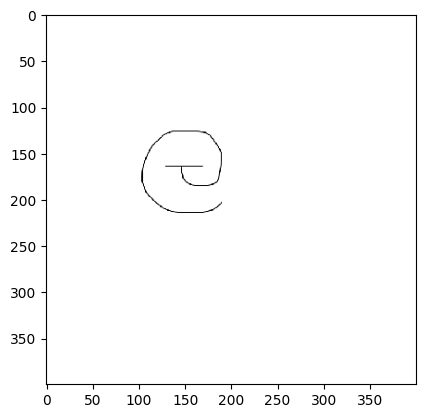

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

Model evaluation

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 3s 3s/step - loss: 0.0342 - accuracy: 1.0000


[0.03423767536878586, 1.0]

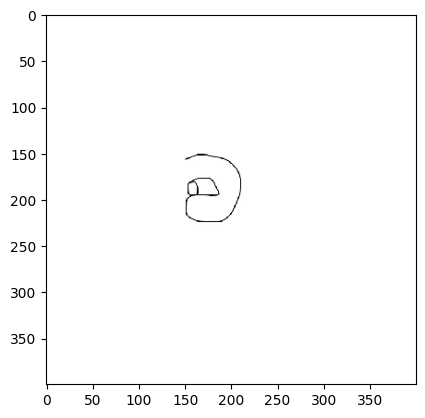

1/1 [==============================] - 0s 181ms/step
මෙය ව අකුර වේ
1/1 [==============================] - 1s 1s/step - loss: 0.0342 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
# Choose a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Display the image
plt.imshow(X_test[idx2, :])
plt.show()

# Predict using the model for the selected image
y_pred = model.predict(X_test[idx2, :].reshape(1, 400, 400, 3))

# Check the prediction and print the result
if np.all(y_pred < 0.5):
    pred = 'ල'
else:
    pred = 'ව'

print("මෙය", pred, "අකුර වේ")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print(f"Test accuracy: {accuracy}")

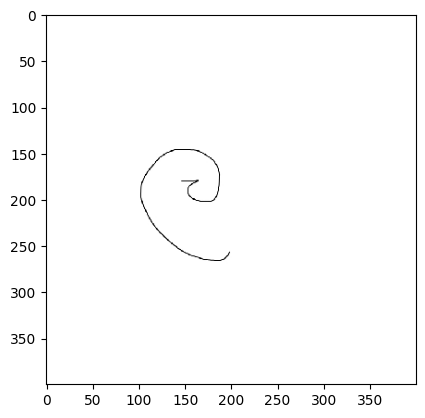

1/1 [==============================] - 0s 55ms/step
මෙය ල අකුර වේ
1/1 [==============================] - 1s 1s/step - loss: 0.0342 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
# Choose a random index from the test set
idx2 = random.randint(0, len(Y_test))

# Display the image
plt.imshow(X_test[idx2, :])
plt.show()

# Predict using the model for the selected image
y_pred = model.predict(X_test[idx2, :].reshape(1, 400, 400, 3))

# Check the prediction and print the result
if np.all(y_pred < 0.5):
    pred = 'ල'
else:
    pred = 'ව'

print("මෙය", pred, "අකුර වේ")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print(f"Test accuracy: {accuracy}")